#IMPORTING REQUIRED LIBRARIES

In [2]:

#bonus Knn,random forest, Naive base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report, confusion_matrix ,mean_squared_error
from sklearn.preprocessing import LabelEncoder


# Read the Heart Disease dataset from a CSV file and store it in the 'Df' DataFrame.
# Check for missing values (nulls) in the DataFrame and display the count of null values for each column.

In [3]:
Df = pd.read_csv("/content/Heart_Disease.csv")
Df.isna().sum()

id                         0
Age                        6
Gender                     6
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
work_type                  9
smoking_status             6
Heart Disease              0
dtype: int64

# Fill missing values in the 'Gender', 'smoking_status', and 'work_type' columns with their respective mode values.**bold text.

In [4]:

Df["Gender"].fillna(Df["Gender"].mode()[0], inplace=True)
Df["smoking_status"].fillna(Df["smoking_status"].mode()[0], inplace=True)
Df["work_type"].fillna(Df["work_type"].mode()[0], inplace=True)

# Initialize a K-nearest neighbors (KNN) imputer with 5 neighbors (you can adjust this number as needed).**bold text

In [5]:
imputer = KNNImputer(n_neighbors=5)  # Adjust the number of neighbors as per your preference


#Use the imputer to fill missing values in the 'Age' column based on the values of its neighboring rows.

In [6]:
Df['Age'] = imputer.fit_transform(Df[['Age']])

 # Check for missing values (nulls) in the DataFrame and display the count of null values for each column.



In [7]:
Df.isna().sum()

id                         0
Age                        0
Gender                     0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
work_type                  0
smoking_status             0
Heart Disease              0
dtype: int64

# Create dummy variables for the 'Gender' column to convert categorical data into binary (0 or 1) columns.

In [8]:
dummy = pd.get_dummies(Df['Gender'])


# Concatenate the dummy variables with the original DataFrame 'Df' along the columns (axis=1).


In [9]:
Df = pd.concat((Df,dummy),axis=1)

# Drop the original 'Gender' column and one of the dummy columns (e.g., 'Male') to avoid multicollinearity.


In [10]:
Df = Df.drop(['Gender', 'Male'], axis=1)

# Filling nulls at "Heart Disease" column and concatenate witth the orignal DataFrame then drop the original "Heart Disease"column.

In [11]:
dummy = pd.get_dummies(Df['Heart Disease'])
Df = pd.concat((dummy,Df) , axis=1 )
Df = Df.drop(['Heart Disease','No'],axis=1)
Df = Df.rename(columns={"Yes":"Heart Disease"})

# Create a LabelEncoder instance to encode categorical labels into numerical values.


In [12]:
label_encoder=LabelEncoder()

# Use the LabelEncoder to transform the 'smoking_status' column from categorical values to numerical labels and 'work_type' column from categorical values to numerical labels.


In [13]:
Df["smoking_status"]=label_encoder.fit_transform(Df["smoking_status"])
Df["work_type"]=label_encoder.fit_transform(Df["work_type"])

# Display information about the DataFrame 'Df,' including data types, non-null counts, and memory usage.


In [14]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Heart Disease            270 non-null    uint8  
 1   id                       270 non-null    int64  
 2   Age                      270 non-null    float64
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  work_type                2

In [15]:
# Get the number of rows and columns
num_rows, num_cols = Df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")
Df.head()


Number of rows: 270
Number of columns: 17


,Heart Disease,id,Age,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Female
0,1,1,70.0,4,130,322,0,2,109,0,2.4,2,3,3,2,1,1
1,0,2,67.0,3,115,564,0,2,160,0,1.6,2,0,7,3,2,0
2,1,3,57.0,2,124,261,0,0,141,0,0.3,1,0,7,2,2,1
3,0,4,64.0,4,128,263,0,0,105,1,0.2,2,1,7,2,3,1
4,0,5,74.0,2,120,269,0,2,121,1,0.2,1,1,3,3,2,0


In [16]:
Df.head()

,Heart Disease,id,Age,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Female
0,1,1,70.0,4,130,322,0,2,109,0,2.4,2,3,3,2,1,1
1,0,2,67.0,3,115,564,0,2,160,0,1.6,2,0,7,3,2,0
2,1,3,57.0,2,124,261,0,0,141,0,0.3,1,0,7,2,2,1
3,0,4,64.0,4,128,263,0,0,105,1,0.2,2,1,7,2,3,1
4,0,5,74.0,2,120,269,0,2,121,1,0.2,1,1,3,3,2,0


# [ Create a heatmap to visualize the correlation matrix of the DataFrame 'Df.']


<Axes: >

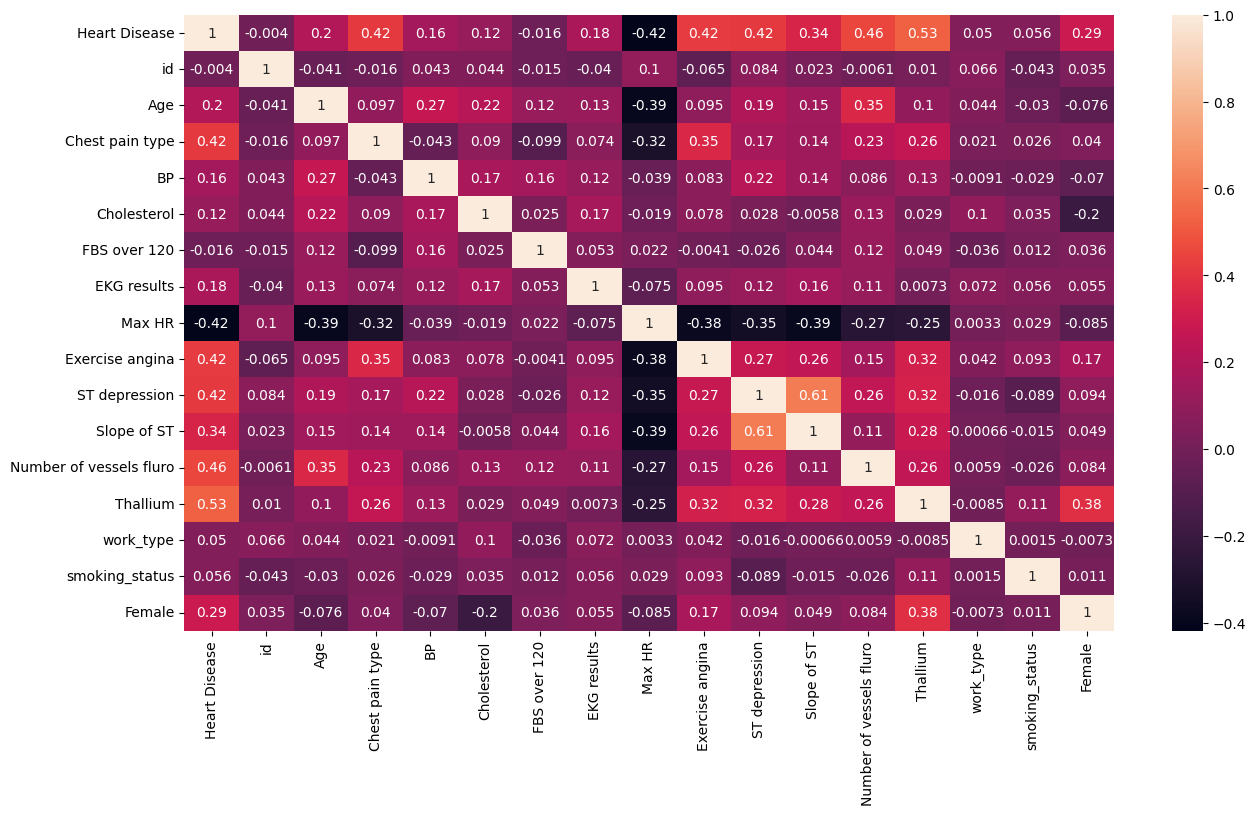

In [17]:
plt.figure(figsize = (15,8))
sns.heatmap(Df.iloc[:,:].corr(), annot=True)

# Display the first few rows of the DataFrame 'Df' to provide an initial overview of the dataset's structure and content.


In [18]:
Df.head()

,Heart Disease,id,Age,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Female
0,1,1,70.0,4,130,322,0,2,109,0,2.4,2,3,3,2,1,1
1,0,2,67.0,3,115,564,0,2,160,0,1.6,2,0,7,3,2,0
2,1,3,57.0,2,124,261,0,0,141,0,0.3,1,0,7,2,2,1
3,0,4,64.0,4,128,263,0,0,105,1,0.2,2,1,7,2,3,1
4,0,5,74.0,2,120,269,0,2,121,1,0.2,1,1,3,3,2,0


In [19]:
# Get the number of rows and columns
num_rows, num_cols = Df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")
Df.head()

Number of rows: 270
Number of columns: 17


,Heart Disease,id,Age,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Female
0,1,1,70.0,4,130,322,0,2,109,0,2.4,2,3,3,2,1,1
1,0,2,67.0,3,115,564,0,2,160,0,1.6,2,0,7,3,2,0
2,1,3,57.0,2,124,261,0,0,141,0,0.3,1,0,7,2,2,1
3,0,4,64.0,4,128,263,0,0,105,1,0.2,2,1,7,2,3,1
4,0,5,74.0,2,120,269,0,2,121,1,0.2,1,1,3,3,2,0


# Viewing the Df columns and checking for null values .

In [20]:
print(Df.columns)
Df.isna().sum()

Index(['Heart Disease', 'id', 'Age', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium',
       'work_type', 'smoking_status', 'Female'],
      dtype='object')


Heart Disease              0
id                         0
Age                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
work_type                  0
smoking_status             0
Female                     0
dtype: int64

# Split the data into features and target variable


In [21]:
X = Df.drop('Heart Disease' , axis=1)
y = Df['Heart Disease']

# Perform feature selection using information gain

In [22]:

k = 5 # Number of top features to select
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_new = selector.fit_transform(X, y)


# Get the selected feature indices

In [23]:
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features

In [24]:
selected_features = X.columns[selected_indices]

# Print the selected features


In [25]:
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['Chest pain type', 'Exercise angina', 'ST depression',
       'Number of vessels fluro', 'Thallium'],
      dtype='object')


#Box for detecting outliers

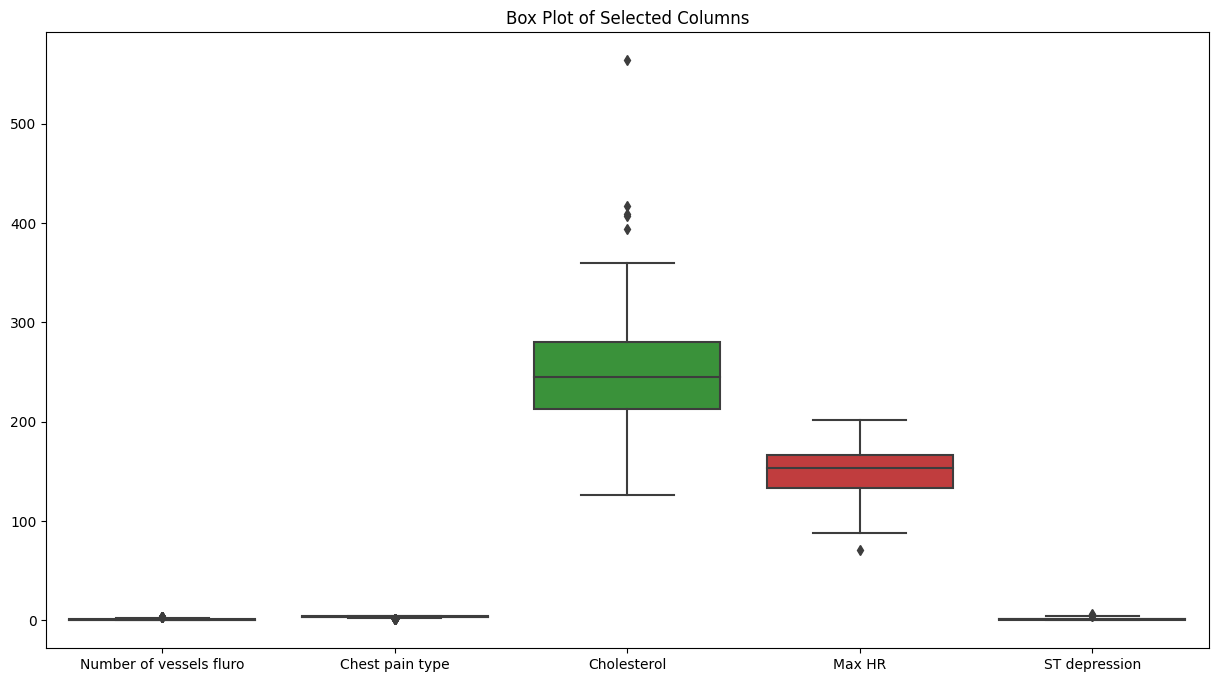

In [26]:
# Specify the columns of interest
columns_of_interest = ['Number of vessels fluro', 'Chest pain type', 'Cholesterol', 'Max HR', 'ST depression']

# Create a figure with a specific size
plt.figure(figsize=(15, 8))

# Create the box plot using seaborn
sns.boxplot(data=Df[columns_of_interest])

# Set the x-axis labels
plt.xticks(range(len(columns_of_interest)), columns_of_interest)

# Set the plot title
plt.title('Box Plot of Selected Columns')

# Show the plot
plt.show()


#Iterating in the selected columns to replace the null values with mean

In [27]:
for col in Df.columns:
    q25, q75 = np.percentile(Df[col], [25, 75])
    iqr = q75 - q25
    lower, upper = q25 - (iqr * 1.5), q75 + (iqr * 1.5)
    outliers = (Df[col] < lower) | (Df[col] > upper)

    if outliers.any():
        mean_value = Df[~outliers][col].mean()
        Df.loc[outliers, col] = mean_value
        print(f'Replaced {sum(outliers)} outliers in {col} with the mean value: {mean_value}')
    else:
        print(f'No outliers found in {col}')


No outliers found in Heart Disease
No outliers found in id
No outliers found in Age
Replaced 20 outliers in Chest pain type with the mean value: 3.348
Replaced 9 outliers in BP with the mean value: 129.61302681992336
Replaced 5 outliers in Cholesterol with the mean value: 246.10188679245283
Replaced 40 outliers in FBS over 120 with the mean value: 0.0
No outliers found in EKG results
Replaced 1 outliers in Max HR with the mean value: 149.9702602230483
No outliers found in Exercise angina
Replaced 4 outliers in ST depression with the mean value: 0.9898496240601502
No outliers found in Slope of ST
Replaced 19 outliers in Number of vessels fluro with the mean value: 0.4940239043824701
No outliers found in Thallium
Replaced 32 outliers in work_type with the mean value: 2.2983193277310923
No outliers found in smoking_status
No outliers found in Female


#Showing the Box Plot after filling the nulls values

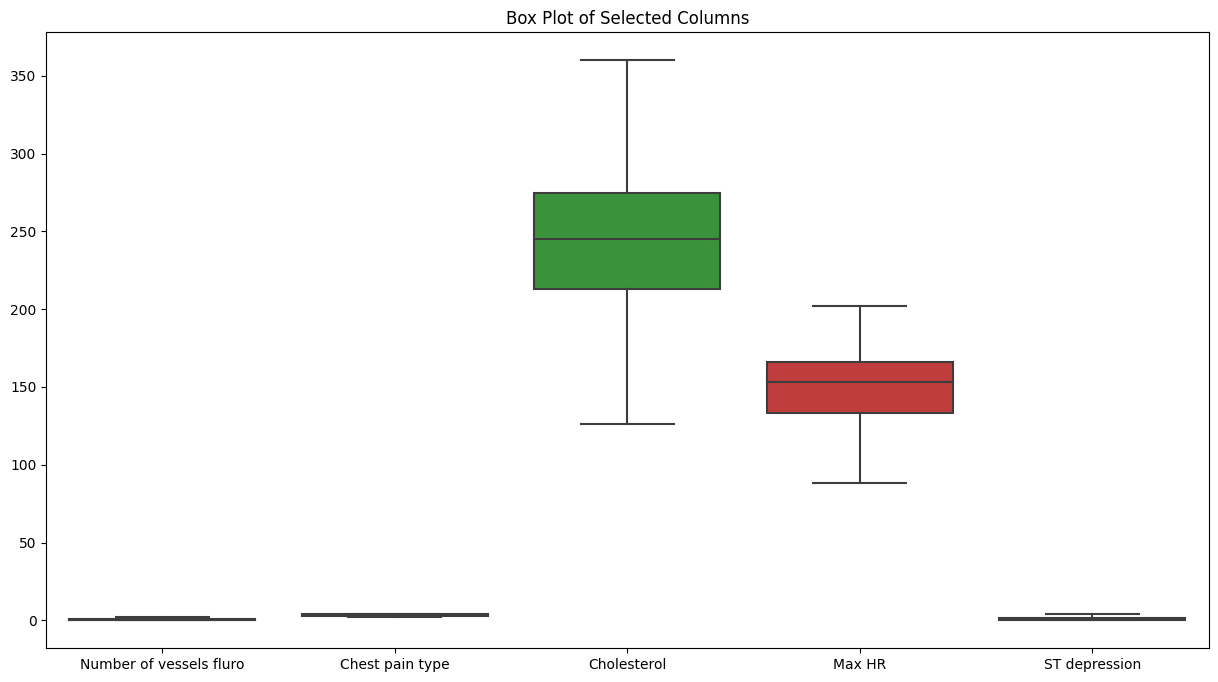

In [28]:

# Specify the columns of interest
columns_of_interest = ['Number of vessels fluro', 'Chest pain type', 'Cholesterol', 'Max HR', 'ST depression']

# Create a figure with a specific size
plt.figure(figsize=(15, 8))

# Create the box plot using seaborn
sns.boxplot(data=Df[columns_of_interest])

# Set the x-axis labels
plt.xticks(range(len(columns_of_interest)), columns_of_interest)

# Set the plot title
plt.title('Box Plot of Selected Columns')

# Show the plot
plt.show()


#Showing the discription of the DF columns after preprocessing stage

In [29]:
Df.describe()

,Heart Disease,id,Age,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Female
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.0,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,0.444444,135.500000,54.424242,3.348000,129.613027,246.101887,0.0,1.022222,149.970260,0.329630,0.989850,1.585185,0.494024,4.696296,2.298319,1.522222,0.685185
std,0.497827,78.086491,9.080492,0.723282,15.147100,43.860130,0.0,0.997891,22.661708,0.470952,1.028881,0.614390,0.691803,1.940659,0.463618,0.981931,0.465305
min,0.000000,1.000000,29.000000,2.000000,94.000000,126.000000,0.0,0.000000,88.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.000000,0.000000
25%,0.000000,68.250000,48.000000,3.000000,120.000000,213.000000,0.0,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,2.000000,1.000000,0.000000
50%,0.000000,135.500000,54.712121,3.348000,130.000000,245.000000,0.0,2.000000,153.500000,0.000000,0.800000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000
75%,1.000000,202.750000,61.000000,4.000000,140.000000,274.750000,0.0,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,3.000000,2.000000,1.000000
max,1.000000,270.000000,77.000000,4.000000,170.000000,360.000000,0.0,2.000000,202.000000,1.000000,4.000000,3.000000,2.000000,7.000000,4.000000,3.000000,1.000000


# Split the data into features and target variable

In [30]:

X = Df.drop('Heart Disease' , axis=1)
y = Df['Heart Disease']

# Evaluate a Decision Tree classifier on selected features:
# - Create a dataset (X_selected) with specific columns.
# - Split the data into training and testing sets.
# - Train the classifier, make predictions, and evaluate accuracy.
# - Calculate additional metrics like classification report, confusion matrix, and mean squared error.

In [31]:


# Create a new dataset (X_selected) by selecting only the columns corresponding to the selected features
selected_features = ['Chest pain type', 'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium']
X_selected = Df[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=41)

# Create a Decision Tree classifier
dt_model = DecisionTreeClassifier()

# Train the model on the training set
dt_model.fit(X_train, y_train)

# Predict the classes of the testing set
y_pred = dt_model.predict(X_test)

# Evaluate the model's accuracy on testing set
aaccuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {aaccuracy}")

# Predict the classes of the training set
y_train_pred = dt_model.predict(X_train)

# Calculate the training accuracy
atraining_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {atraining_accuracy}")
#############
cr=classification_report(y_test, y_pred)
print(cr)
################

cm = confusion_matrix(y_test, y_pred)
cm

#############
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Accuracy: 0.8518518518518519
Training Accuracy: 0.9027777777777778
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        32
           1       0.89      0.73      0.80        22

    accuracy                           0.85        54
   macro avg       0.86      0.83      0.84        54
weighted avg       0.86      0.85      0.85        54

Mean Squared Error: 0.14814814814814814


# Perform a classification task using a Decision Tree classifier:
# - Prepare the data by selecting relevant features.
# - Split the data into training and testing sets.
# - Train the classifier with a specified maximum depth.
# - Evaluate model performance with accuracy, classification report, confusion matrix, and mean squared error.


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error

# Split the data into features and target variable
X = Df.drop('Heart Disease' , axis=1)
y = Df['Heart Disease']

# Create a new dataset (X_selected) by selecting only the columns corresponding to the selected features
selected_features = ['Chest pain type', 'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium']
X_selected = Df[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=41)

# Create a Decision Tree classifier with max_depth hyperparameter
dt_model = DecisionTreeClassifier(max_depth=5)

# Train the model on the training set
dt_model.fit(X_train, y_train)

# Predict the classes of the testing set
y_pred = dt_model.predict(X_test)

# Evaluate the model's accuracy on the testing set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Predict the classes of the training set
y_train_pred = dt_model.predict(X_train)

# Calculate the training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {training_accuracy}")

# Print classification report
cr = classification_report(y_test, y_pred)
print(cr)

# Calculate and print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Accuracy: 0.8888888888888888
Training Accuracy: 0.8842592592592593
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        32
           1       0.90      0.82      0.86        22

    accuracy                           0.89        54
   macro avg       0.89      0.88      0.88        54
weighted avg       0.89      0.89      0.89        54

[[30  2]
 [ 4 18]]
Mean Squared Error: 0.1111111111111111


# Perform classification using a Random Forest classifier:
# - Prepare the data by selecting relevant features.
# - Split the data into training and testing sets.
# - Train the Random Forest classifier with 100 estimators.
# - Evaluate model performance with accuracy, classification report, confusion matrix, and mean squared error.


In [33]:
# Split the data into features (X) and the target variable (y)
X = Df.drop('Heart Disease' , axis=1)
y = Df['Heart Disease']

# Create a new dataset (X_selected) by selecting only the columns corresponding to the selected features
selected_features = ['Chest pain type', 'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium']
X_selected = Df[selected_features]

# Split the selected data and the target variable into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=33)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Predict the classes of the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the model's accuracy on the testing set
baccuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {baccuracy}")

# Predict the classes of the training set
y_train_pred = rf_model.predict(X_train)

# Calculate the training accuracy
btraining_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {btraining_accuracy}")
#############
cr=classification_report(y_test, y_pred)
print(cr)
################

cm = confusion_matrix(y_test, y_pred)
cm

#############
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Accuracy: 0.9074074074074074
Training Accuracy: 0.8842592592592593
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.76      0.86        21

    accuracy                           0.91        54
   macro avg       0.93      0.88      0.90        54
weighted avg       0.92      0.91      0.90        54

Mean Squared Error: 0.09259259259259259


# Perform classification using a Support Vector Machine (SVM) with a linear kernel:
# - Prepare the data by splitting it into features and target variable.
# - Split the data into training and testing sets.
# - Create an SVM model with a linear kernel.
# - Train the SVM model on the training set.
# - Evaluate model performance with accuracy, classification report, confusion matrix, and mean squared error.


In [34]:
# Split the data into features and target variable
X = Df.drop('Heart Disease' , axis=1)
y = Df['Heart Disease']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=39)

# Create the SVM model with a linear kernel
svm_model = SVC(kernel='linear')

# Train the model on the training set
svm_model.fit(X_train, y_train)

# Predict the classes of the testing set
y_pred = svm_model.predict(X_test)

# Evaluate the model's accuracy on testing set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Predict the classes of the training set
y_train_pred = svm_model.predict(X_train)

# Calculate the training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {training_accuracy}")

cr=classification_report(y_test, y_pred)
print(cr)


cm = confusion_matrix(y_test, y_pred)
cm


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Accuracy: 0.8518518518518519
Training Accuracy: 0.8148148148148148
              precision    recall  f1-score   support

           0       0.81      0.88      0.85        25
           1       0.89      0.83      0.86        29

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.85      0.85      0.85        54

Mean Squared Error: 0.14814814814814814


# Perform classification using Logistic Regression:
# - Prepare the data by splitting it into features and target variable.
# - Split the data into training and testing sets.
# - Initialize a Logistic Regression model.
# - Train the model on the training data and calculate the training accuracy.
# - Evaluate model performance with accuracy, classification report, confusion matrix, and mean squared error.


In [35]:
# Split the data into features and target
X = Df.drop('Heart Disease' , axis=1)
y = Df['Heart Disease']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=30)
# Initialize the model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
print(f"Training Accuracy: {train_score}")
# Evaluate the model on the testing data
score = model.score(X_test, y_test)
print(f"Accuracy: {score}")

cr=classification_report(y_test, y_pred)
print(cr)


cm = confusion_matrix(y_test, y_pred)
cm


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Training Accuracy: 0.8055555555555556
Accuracy: 0.8518518518518519
              precision    recall  f1-score   support

           0       0.67      0.55      0.60        33
           1       0.44      0.57      0.50        21

    accuracy                           0.56        54
   macro avg       0.56      0.56      0.55        54
weighted avg       0.58      0.56      0.56        54

Mean Squared Error: 0.4444444444444444


# Perform classification using Logistic Regression with regularization (C=0.1):
# - Prepare the data by splitting it into features and target variable.
# - Split the data into training and testing sets.
# - Initialize a Logistic Regression model with a regularization parameter (C=0.1).
# - Train the model on the training data and calculate the training accuracy.
# - Evaluate model performance with accuracy, classification report, confusion matrix, and mean squared error.


In [36]:

# Split the data into features and target
X = Df.drop('Heart Disease' , axis=1)
y = Df['Heart Disease']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize the model with a regularization parameter (C) of 0.1
model = LogisticRegression(C=0.1)

# Train the model on the training data
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
print(f"Training Accuracy: {train_score}")

# Evaluate the model on the testing data
score = model.score(X_test, y_test)
print(f"Accuracy: {score}")

# Predict the classes of the testing set
y_pred = model.predict(X_test)

# Print the classification report
cr = classification_report(y_test, y_pred)
print(cr)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Training Accuracy: 0.8194444444444444
Accuracy: 0.7962962962962963
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        33
           1       0.75      0.71      0.73        21

    accuracy                           0.80        54
   macro avg       0.79      0.78      0.78        54
weighted avg       0.79      0.80      0.80        54

[[28  5]
 [ 6 15]]
Mean Squared Error: 0.2037037037037037
